In [1]:
#Loading required libraries

#Data Manipulation
import pandas as pd
import numpy as np

#Displaying graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading Datasets
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets for ML/Data Science Evaluation.csv')

In [4]:
#Checking values in the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               65535 non-null  object 
 1   Country              65535 non-null  object 
 2   Item Type            65535 non-null  object 
 3   Fiscal Year          65535 non-null  int64  
 4   Sales Channel        65535 non-null  object 
 5   Order Priority       65535 non-null  object 
 6   Order Date           65535 non-null  object 
 7   Order ID             65535 non-null  int64  
 8   Ship Date            65535 non-null  object 
 9   Units Sold           65535 non-null  int64  
 10  Unit Price           65535 non-null  float64
 11  Unit Cost            65535 non-null  float64
 12  Total Revenue        65535 non-null  float64
 13  Total Cost           65535 non-null  float64
 14  Total Profit         65535 non-null  float64
 15  Profit as % of Cost  65535 non-null 

In [10]:
#Information in dataset
df.describe()

,Fiscal Year,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost
count,65535.000000,6.553500e+04,65535.000000,65535.000000,65535.000000,6.553500e+04,6.553500e+04,6.553500e+04,65535.000000
mean,2013.309560,5.529922e+08,4987.064500,266.192472,187.606190,1.326827e+06,9.350665e+05,3.917610e+05,0.610672
std,2.199086,2.605409e+08,2890.993357,216.999838,175.613364,1.466334e+06,1.146901e+06,3.784097e+05,0.466814
min,2010.000000,1.000149e+08,1.000000,9.330000,6.920000,3.732000e+01,2.768000e+01,9.640000e+00,0.156846
25%,2011.000000,3.267064e+08,2470.000000,81.730000,56.670000,2.764137e+05,1.626588e+05,9.566828e+04,0.348266
50%,2013.000000,5.521281e+08,4983.000000,205.700000,117.110000,7.873129e+05,4.659253e+05,2.809080e+05,0.565887
75%,2015.000000,7.786878e+08,7500.000000,437.200000,263.330000,1.810119e+06,1.197962e+06,5.632895e+05,0.660274
max,2017.000000,9.999939e+08,10000.000000,668.270000,524.960000,6.682032e+06,5.249600e+06,1.738700e+06,2.049107


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               65535 non-null  object 
 1   Country              65535 non-null  object 
 2   Item Type            65535 non-null  object 
 3   Fiscal Year          65535 non-null  int64  
 4   Sales Channel        65535 non-null  object 
 5   Order Priority       65535 non-null  object 
 6   Order Date           65535 non-null  object 
 7   Order ID             65535 non-null  int64  
 8   Ship Date            65535 non-null  object 
 9   Units Sold           65535 non-null  int64  
 10  Unit Price           65535 non-null  float64
 11  Unit Cost            65535 non-null  float64
 12  Total Revenue        65535 non-null  float64
 13  Total Cost           65535 non-null  float64
 14  Total Profit         65535 non-null  float64
 15  Profit as % of Cost  65535 non-null 

In [11]:
#Checking for missing values
df.isnull().any().sum()

0

In [17]:
#to find which products should be dropped from selling in the next year moving forward and which products should be sold more
#First Sort the data by 'Total Profit' 
t = df.groupby('Item Type')
t = t['Total Profit'].agg(['sum']).sort_values(by = 'sum',ascending = False)

In [18]:
t

,sum
Item Type,
Cosmetics,4.730702e+09
Household,4.529908e+09
Office Supplies,3.455633e+09
Baby Food,2.599625e+09
Cereal,2.404806e+09
Clothes,2.009799e+09
Vegetables,1.721000e+09
Meat,1.532258e+09
Snacks,1.508197e+09


In [ ]:
#The highest profit is shown by Cosmetics,Household 

In [19]:
t2 = df.groupby(['Item Type','Region']).agg('sum').sort_values(by = 'Total Profit',ascending = False)

In [20]:
t2

Fiscal Year  ...  Profit as % of Cost
Item Type       Region                                          ...                     
Household       Europe                                 2955534  ...           484.123931
Cosmetics       Sub-Saharan Africa                     2878912  ...           944.192079
                Europe                                 2804462  ...           919.761934
Household       Sub-Saharan Africa                     2774280  ...           454.443308
Office Supplies Europe                                 2935361  ...           350.641001
...                                                        ...  ...                  ...
Beverages       North America                           237567  ...            58.127713
Fruits          Middle East and North Africa           1397272  ...           241.696532
                Central America and the Caribbean      1141511  ...           197.466763
                Australia and Oceania                   873793  ...           151.147399
                North America                           233569  ...            40.398844

[84 rows x 9 columns]

In [21]:
#The highest profit is shown by HouseHold Items from Europe , followed by Cosmetics from Sub-Saharan Africa & Europe

In [26]:
t2 = df.groupby(['Item Type','Region'],as_index=False).agg('sum').sort_values(by = 'Total Profit',ascending = False)

In [27]:
t3 = t2[t2['Item Type']=='Cosmetics']

In [28]:
t3

,Item Type,Region,Fiscal Year,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost
34,Cosmetics,Sub-Saharan Africa,2878912,805622021186,7031209,625196.0,376561.90,3.074045e+09,1.851528e+09,1.222516e+09,944.192079
31,Cosmetics,Europe,2804462,780142678074,6889765,609019.6,366818.69,3.012205e+09,1.814282e+09,1.197923e+09,919.761934
28,Cosmetics,Asia,1747580,476234016706,4234542,379489.6,228570.44,1.851342e+09,1.115082e+09,7.362598e+08,573.117989
32,Cosmetics,Middle East and North Africa,1451533,405449931691,3609127,315221.2,189860.93,1.577910e+09,9.503914e+08,6.275189e+08,476.057685
30,Cosmetics,Central America and the Caribbean,1079115,300692964850,2646583,234339.2,141144.88,1.157086e+09,6.969247e+08,4.601614e+08,353.906961
29,Cosmetics,Australia and Oceania,897884,250490430634,2284148,194991.2,117445.18,9.986295e+08,6.014847e+08,3.971448e+08,294.482285
33,Cosmetics,North America,217457,57465561189,512895,47217.6,28439.64,2.242377e+08,1.350606e+08,8.917705e+07,71.309612


In [29]:
#The top region selling cosmetics as seen above is the Sub-Saharan Africa

In [30]:
t4 = t2[t2['Item Type']=='Household']

In [31]:
final = pd.concat([t3,t4])

In [32]:
final

,Item Type,Region,Fiscal Year,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost
34,Cosmetics,Sub-Saharan Africa,2878912,805622021186,7031209,625196.00,376561.90,3.074045e+09,1.851528e+09,1.222516e+09,944.192079
31,Cosmetics,Europe,2804462,780142678074,6889765,609019.60,366818.69,3.012205e+09,1.814282e+09,1.197923e+09,919.761934
28,Cosmetics,Asia,1747580,476234016706,4234542,379489.60,228570.44,1.851342e+09,1.115082e+09,7.362598e+08,573.117989
32,Cosmetics,Middle East and North Africa,1451533,405449931691,3609127,315221.20,189860.93,1.577910e+09,9.503914e+08,6.275189e+08,476.057685
30,Cosmetics,Central America and the Caribbean,1079115,300692964850,2646583,234339.20,141144.88,1.157086e+09,6.969247e+08,4.601614e+08,353.906961
29,Cosmetics,Australia and Oceania,897884,250490430634,2284148,194991.20,117445.18,9.986295e+08,6.014847e+08,3.971448e+08,294.482285
33,Cosmetics,North America,217457,57465561189,512895,47217.60,28439.64,2.242377e+08,1.350606e+08,8.917705e+07,71.309612
45,Household,Europe,2955534,817828110318,7420737,981020.36,737728.72,4.959056e+09,3.729217e+09,1.229839e+09,484.123931
48,Household,Sub-Saharan Africa,2774280,757974210020,6874610,920876.06,692500.12,4.594096e+09,3.454767e+09,1.139329e+09,454.443308
42,Household,Asia,1566293,429948926845,3790955,519914.06,390976.12,2.533381e+09,1.905107e+09,6.282750e+08,256.572492


In [61]:
#the goods which had least profits
t5 = df.groupby(['Item Type','Region']).agg('sum').sort_values(by = 'Total Profit',ascending = True)

In [62]:
t5

Fiscal Year  ...   days
Item Type       Region                                          ...       
Fruits          North America                           233569  ...   2944
                Australia and Oceania                   873793  ...   9953
                Central America and the Caribbean      1141511  ...  14823
                Middle East and North Africa           1397272  ...  17803
Beverages       North America                           237567  ...   2934
...                                                        ...  ...    ...
Office Supplies Europe                                 2935361  ...  38155
Household       Sub-Saharan Africa                     2774280  ...  34646
Cosmetics       Europe                                 2804462  ...  34672
                Sub-Saharan Africa                     2878912  ...  34947
Household       Europe                                 2955534  ...  37262

[84 rows x 10 columns]

In [65]:
t5 = df.groupby(['Item Type','Region'],as_index= False).agg('sum').sort_values(by = 'Total Profit',ascending = True)

In [66]:
t6 = t5[t5['Item Type']=='Fruits']

In [67]:
t6

,Item Type,Region,Fiscal Year,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost,days
40,Fruits,North America,233569,58753538265,604765,1082.28,802.72,5642457.45,4184973.80,1457483.65,40.398844,2944
36,Fruits,Australia and Oceania,873793,244348838182,2144202,4049.22,3003.28,20005404.66,14837877.84,5167526.82,151.147399,9953
37,Fruits,Central America and the Caribbean,1141511,310056391201,2806998,5290.11,3923.64,26189291.34,19424426.16,6764865.18,197.466763,14823
39,Fruits,Middle East and North Africa,1397272,388333357253,3525305,6475.02,4802.48,32891095.65,24395110.60,8495985.05,241.696532,17803
35,Fruits,Asia,1608592,444683451269,3920100,7454.67,5529.08,36574533.00,27127092.00,9447441.00,278.264451,20113
41,Fruits,Sub-Saharan Africa,2850633,787474006609,6966450,13211.28,9798.72,64996978.50,48207834.00,16789144.50,493.144509,36450
38,Fruits,Europe,2832753,789148736392,7056520,13127.31,9736.44,65837331.60,48831118.40,17006213.20,490.010116,35008


In [68]:
t7 = t5[t5['Item Type']=='Beverages']

In [69]:
t7

,Item Type,Region,Fiscal Year,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost,days
12,Beverages,North America,237567,65276871124,581632,5599.10,3751.22,2.759844e+07,1.849008e+07,9.108357e+06,58.127713,2934
8,Beverages,Australia and Oceania,899906,249403632858,2255381,21210.15,14210.13,1.070178e+08,7.169856e+07,3.531927e+07,220.195659,11314
9,Beverages,Central America and the Caribbean,1216065,331503393531,3009214,28659.80,19201.16,1.427872e+08,9.566291e+07,4.712429e+07,297.535074,15305
11,Beverages,Middle East and North Africa,1326805,355808261461,3256752,31269.55,20949.61,1.545329e+08,1.035321e+08,5.100074e+07,324.628499,16052
7,Beverages,Asia,1546251,429354545743,3731819,36441.60,24414.72,1.770748e+08,1.186345e+08,5.844029e+07,378.322743,18872
13,Beverages,Sub-Saharan Africa,2945454,819061076260,7228462,69419.35,46508.77,3.429905e+08,2.297928e+08,1.131977e+08,720.685121,35729
10,Beverages,Europe,2889166,783163353432,7356626,68090.75,45618.65,3.490719e+08,2.338671e+08,1.152048e+08,706.892104,36064


In [71]:
final2 =pd.concat([t6,t7])
final2

,Item Type,Region,Fiscal Year,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost,days
40,Fruits,North America,233569,58753538265,604765,1082.28,802.72,5.642457e+06,4.184974e+06,1.457484e+06,40.398844,2944
36,Fruits,Australia and Oceania,873793,244348838182,2144202,4049.22,3003.28,2.000540e+07,1.483788e+07,5.167527e+06,151.147399,9953
37,Fruits,Central America and the Caribbean,1141511,310056391201,2806998,5290.11,3923.64,2.618929e+07,1.942443e+07,6.764865e+06,197.466763,14823
39,Fruits,Middle East and North Africa,1397272,388333357253,3525305,6475.02,4802.48,3.289110e+07,2.439511e+07,8.495985e+06,241.696532,17803
35,Fruits,Asia,1608592,444683451269,3920100,7454.67,5529.08,3.657453e+07,2.712709e+07,9.447441e+06,278.264451,20113
41,Fruits,Sub-Saharan Africa,2850633,787474006609,6966450,13211.28,9798.72,6.499698e+07,4.820783e+07,1.678914e+07,493.144509,36450
38,Fruits,Europe,2832753,789148736392,7056520,13127.31,9736.44,6.583733e+07,4.883112e+07,1.700621e+07,490.010116,35008
12,Beverages,North America,237567,65276871124,581632,5599.10,3751.22,2.759844e+07,1.849008e+07,9.108357e+06,58.127713,2934
8,Beverages,Australia and Oceania,899906,249403632858,2255381,21210.15,14210.13,1.070178e+08,7.169856e+07,3.531927e+07,220.195659,11314
9,Beverages,Central America and the Caribbean,1216065,331503393531,3009214,28659.80,19201.16,1.427872e+08,9.566291e+07,4.712429e+07,297.535074,15305


In [73]:
#Fruits and Beverages from North America,Australia and Oceania as seen as above

In [33]:
#Which products are the easiest to sell. 

In [34]:
#The datatypes of Order Date,Ship Date are object

df.dtypes

Region                  object
Country                 object
Item Type               object
Fiscal Year              int64
Sales Channel           object
Order Priority          object
Order Date              object
Order ID                 int64
Ship Date               object
Units Sold               int64
Unit Price             float64
Unit Cost              float64
Total Revenue          float64
Total Cost             float64
Total Profit           float64
Profit as % of Cost    float64
dtype: object

In [43]:
#We cannot process the dates as objects so converting them to date format
df[['Ship Date','Order Date']] = df[['Ship Date','Order Date']].apply(pd.to_datetime)

In [44]:
#The number of days between the date of the order placed and when it is shipped , is added to the dataframe
df['days'] = df['Ship Date'] - df['Order Date']

In [45]:
df

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost,days
0,Sub-Saharan Africa,Cote d'Ivoire,Snacks,2010,Online,C,2010-04-23,241891753,2010-04-26,10000,152.58,97.44,1525800.00,974400.00,551400.00,0.565887,3 days
1,Sub-Saharan Africa,Ethiopia,Snacks,2010,Online,H,2010-06-06,530075585,2010-07-01,10000,152.58,97.44,1525800.00,974400.00,551400.00,0.565887,25 days
2,Central America and the Caribbean,Panama,Clothes,2011,Offline,H,2011-01-02,293357980,2011-01-22,10000,109.28,35.84,1092800.00,358400.00,734400.00,2.049107,20 days
3,Europe,Sweden,Office Supplies,2012,Online,L,2012-10-02,360841929,2012-10-20,10000,651.21,524.96,6512100.00,5249600.00,1262500.00,0.240495,18 days
4,Europe,Romania,Cosmetics,2016,Online,M,2016-03-16,707318103,2016-05-03,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,0.660274,48 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,Sub-Saharan Africa,Sudan,Meat,2015,Online,H,2015-05-06,678830897,2015-05-14,2,421.89,364.69,843.78,729.38,114.40,0.156846,8 days
65531,Sub-Saharan Africa,Ethiopia,Vegetables,2013,Online,M,2013-01-07,814846360,2013-02-02,1,154.06,90.93,154.06,90.93,63.13,0.694270,26 days
65532,Middle East and North Africa,Iran,Cereal,2014,Online,L,2014-06-25,550689113,2014-06-27,1,205.70,117.11,205.70,117.11,88.59,0.756468,2 days
65533,Sub-Saharan Africa,Lesotho,Snacks,2015,Offline,H,2015-11-06,775984799,2015-11-27,1,152.58,97.44,152.58,97.44,55.14,0.565887,21 days


In [39]:
final_df = df

In [46]:
#For extracting only the number of days from the difference 
final_df['days'] = df['days'].dt.days.astype(int)

In [47]:
final_df

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost,days
0,Sub-Saharan Africa,Cote d'Ivoire,Snacks,2010,Online,C,2010-04-23,241891753,2010-04-26,10000,152.58,97.44,1525800.00,974400.00,551400.00,0.565887,3
1,Sub-Saharan Africa,Ethiopia,Snacks,2010,Online,H,2010-06-06,530075585,2010-07-01,10000,152.58,97.44,1525800.00,974400.00,551400.00,0.565887,25
2,Central America and the Caribbean,Panama,Clothes,2011,Offline,H,2011-01-02,293357980,2011-01-22,10000,109.28,35.84,1092800.00,358400.00,734400.00,2.049107,20
3,Europe,Sweden,Office Supplies,2012,Online,L,2012-10-02,360841929,2012-10-20,10000,651.21,524.96,6512100.00,5249600.00,1262500.00,0.240495,18
4,Europe,Romania,Cosmetics,2016,Online,M,2016-03-16,707318103,2016-05-03,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,0.660274,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,Sub-Saharan Africa,Sudan,Meat,2015,Online,H,2015-05-06,678830897,2015-05-14,2,421.89,364.69,843.78,729.38,114.40,0.156846,8
65531,Sub-Saharan Africa,Ethiopia,Vegetables,2013,Online,M,2013-01-07,814846360,2013-02-02,1,154.06,90.93,154.06,90.93,63.13,0.694270,26
65532,Middle East and North Africa,Iran,Cereal,2014,Online,L,2014-06-25,550689113,2014-06-27,1,205.70,117.11,205.70,117.11,88.59,0.756468,2
65533,Sub-Saharan Africa,Lesotho,Snacks,2015,Offline,H,2015-11-06,775984799,2015-11-27,1,152.58,97.44,152.58,97.44,55.14,0.565887,21


In [48]:
#For finding items and regions that were shipped the fastest
final_df = final_df[final_df['days'] <=10]


In [49]:
final_df

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost,days
0,Sub-Saharan Africa,Cote d'Ivoire,Snacks,2010,Online,C,2010-04-23,241891753,2010-04-26,10000,152.58,97.44,1525800.00,974400.00,551400.00,0.565887,3
9,Sub-Saharan Africa,Chad,Household,2013,Online,L,2013-11-18,876551759,2013-11-22,9999,668.27,502.54,6682031.73,5024897.46,1657134.27,0.329785,4
20,Sub-Saharan Africa,Mauritania,Clothes,2010,Offline,H,2010-07-11,874186265,2010-07-15,9997,109.28,35.84,1092472.16,358292.48,734179.68,2.049107,4
33,Middle East and North Africa,Morocco,Beverages,2011,Offline,C,2011-09-04,367532861,2011-09-09,9996,47.45,31.79,474310.20,317772.84,156537.36,0.492608,5
37,Sub-Saharan Africa,Lesotho,Beverages,2013,Online,L,2013-11-26,654533946,2013-11-28,9995,47.45,31.79,474262.75,317741.05,156521.70,0.492608,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65518,Europe,Portugal,Baby Food,2010,Offline,M,2010-03-11,920144307,2010-03-20,3,255.28,159.42,765.84,478.26,287.58,0.601305,9
65519,Europe,Spain,Beverages,2010,Online,L,2010-06-07,596511971,2010-06-09,3,47.45,31.79,142.35,95.37,46.98,0.492608,2
65527,Middle East and North Africa,Iraq,Personal Care,2014,Online,C,2014-09-03,505001437,2014-09-09,2,81.73,56.67,163.46,113.34,50.12,0.442209,6
65530,Sub-Saharan Africa,Sudan,Meat,2015,Online,H,2015-05-06,678830897,2015-05-14,2,421.89,364.69,843.78,729.38,114.40,0.156846,8


In [50]:
groups = final_df.groupby(final_df['days'])

In [52]:
#Finding all the goods shipped on the days the orders were placed
Num_of_days_0 = groups.get_group(0)
Num_of_days_0

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost,days
45,Middle East and North Africa,Libya,Beverages,2016,Online,M,2016-06-19,128449761,2016-06-19,9994,47.45,31.79,474215.30,317709.26,156506.04,0.492608,0
101,Asia,Nepal,Cosmetics,2013,Offline,H,2013-10-21,977895915,2013-10-21,9987,437.20,263.33,4366316.40,2629876.71,1736439.69,0.660274,0
202,Central America and the Caribbean,Belize,Personal Care,2011,Offline,M,2011-07-19,481076133,2011-07-19,9973,81.73,56.67,815093.29,565169.91,249923.38,0.442209,0
286,Europe,Finland,Cosmetics,2013,Online,H,2013-10-18,379968440,2013-10-18,9960,437.20,263.33,4354512.00,2622766.80,1731745.20,0.660274,0
367,Asia,Taiwan,Clothes,2016,Offline,C,2016-01-17,278860747,2016-01-17,9947,109.28,35.84,1087008.16,356500.48,730507.68,2.049107,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65266,Australia and Oceania,Palau,Personal Care,2015,Offline,H,2015-05-20,619795262,2015-05-20,46,81.73,56.67,3759.58,2606.82,1152.76,0.442209,0
65284,Europe,Finland,Personal Care,2014,Offline,C,2014-12-04,178260314,2014-12-04,43,81.73,56.67,3514.39,2436.81,1077.58,0.442209,0
65360,Middle East and North Africa,Pakistan,Fruits,2013,Offline,C,2013-10-26,974787127,2013-10-26,28,9.33,6.92,261.24,193.76,67.48,0.348266,0
65414,Asia,Myanmar,Clothes,2012,Online,H,2012-02-20,374122512,2012-02-20,20,109.28,35.84,2185.60,716.80,1468.80,2.049107,0


In [53]:
Num_of_days_0.groupby('Region').size()

Region
Asia                                 189
Australia and Oceania                 86
Central America and the Caribbean    145
Europe                               319
Middle East and North Africa         151
North America                         26
Sub-Saharan Africa                   342
dtype: int64

In [54]:
#The goods were shipped the fastest by Sub-Saharan Africa, followed by Europe 
#Cosmetics and clothes are shipped the fastest

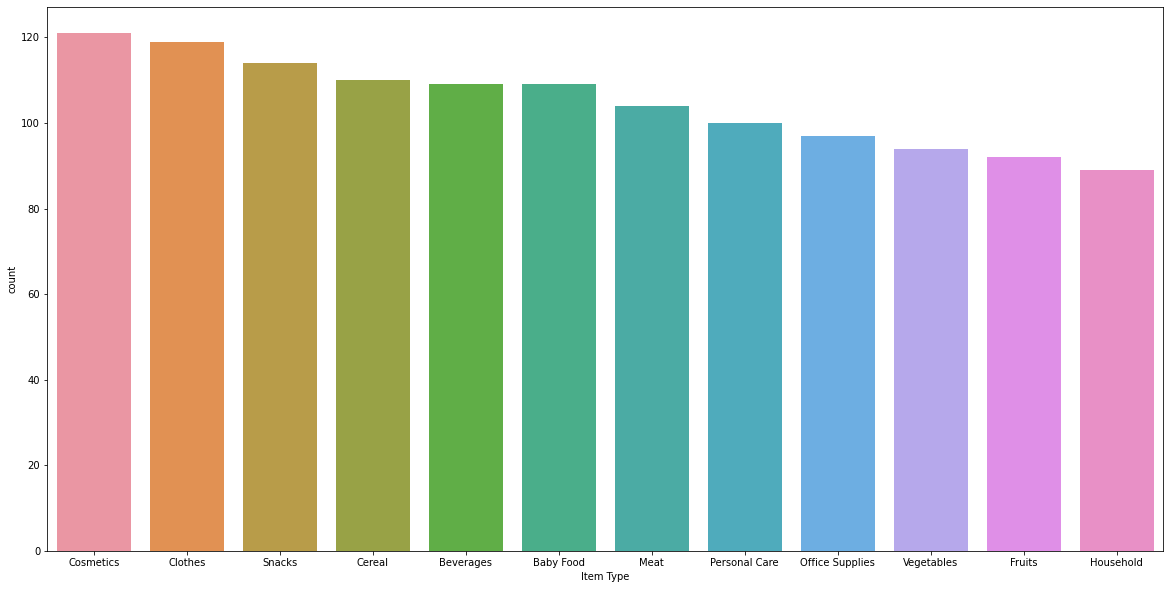

In [55]:
fig_dims = (20,10)

fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Item Type', data= Num_of_days_0,order = Num_of_days_0['Item Type'].value_counts().index);

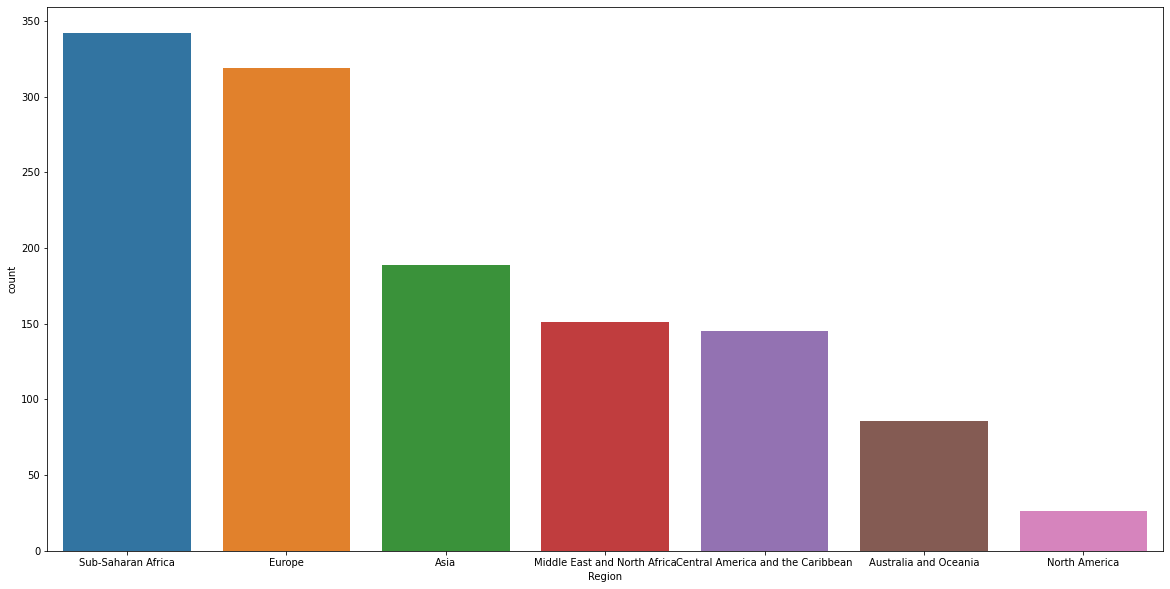

In [56]:
fig_dims = (20,10)

fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Region', data= Num_of_days_0,order = Num_of_days_0['Region'].value_counts().index);

In [57]:
Num_of_days_1 = groups.get_group(1)
Num_of_days_1

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost,days
43,Sub-Saharan Africa,Lesotho,Office Supplies,2011,Offline,M,2011-04-25,369763171,2011-04-26,9994,651.21,524.96,6508192.74,5246450.24,1261742.50,0.240495,1
97,Middle East and North Africa,Pakistan,Meat,2012,Offline,L,2012-01-21,910411965,2012-01-22,9987,421.89,364.69,4213415.43,3642159.03,571256.40,0.156846,1
229,Sub-Saharan Africa,Uganda,Cereal,2010,Online,L,2010-08-29,408861196,2010-08-30,9968,205.70,117.11,2050417.60,1167352.48,883065.12,0.756468,1
475,Australia and Oceania,Vanuatu,Snacks,2017,Offline,M,2017-07-11,460158336,2017-07-12,9932,152.58,97.44,1515424.56,967774.08,547650.48,0.565887,1
513,Europe,Poland,Cosmetics,2014,Online,C,2014-09-11,366147124,2014-09-12,9926,437.20,263.33,4339647.20,2613813.58,1725833.62,0.660274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65170,Central America and the Caribbean,El Salvador,Fruits,2014,Online,H,2014-04-14,214249551,2014-04-15,58,9.33,6.92,541.14,401.36,139.78,0.348266,1
65189,Europe,Albania,Office Supplies,2010,Online,M,2010-10-05,168426692,2010-10-06,56,651.21,524.96,36467.76,29397.76,7070.00,0.240495,1
65285,Central America and the Caribbean,Jamaica,Meat,2015,Online,C,2015-06-06,308632409,2015-06-07,43,421.89,364.69,18141.27,15681.67,2459.60,0.156846,1
65429,Asia,Kazakhstan,Clothes,2016,Offline,M,2016-09-09,458671748,2016-09-10,18,109.28,35.84,1967.04,645.12,1321.92,2.049107,1


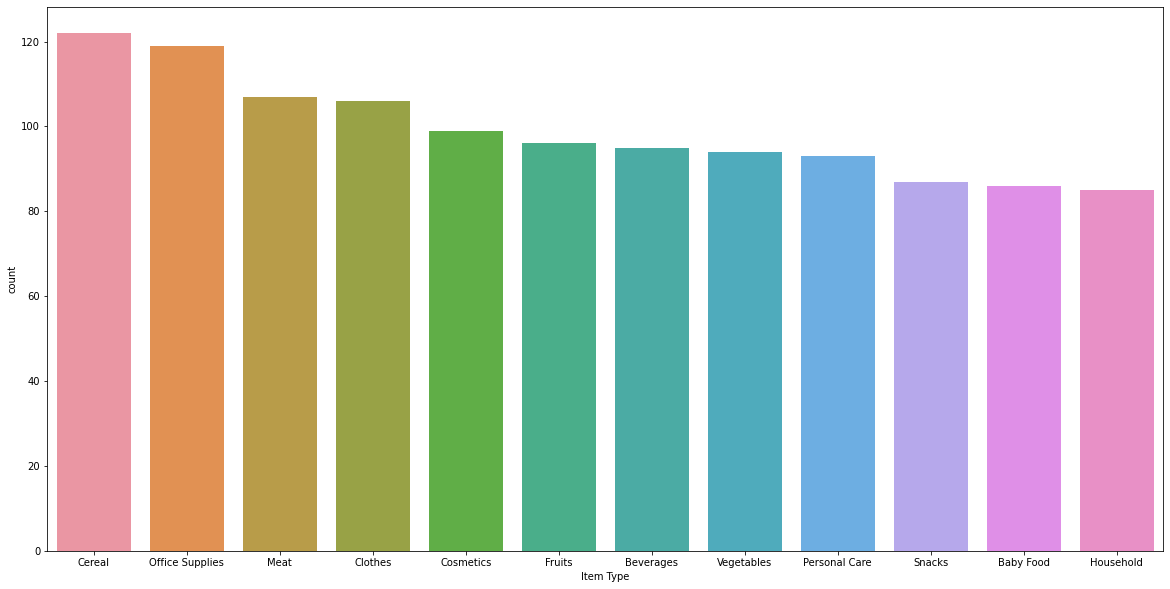

In [58]:
fig_dims = (20, 10)

fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Item Type', data= Num_of_days_1,order = Num_of_days_1['Item Type'].value_counts().index);

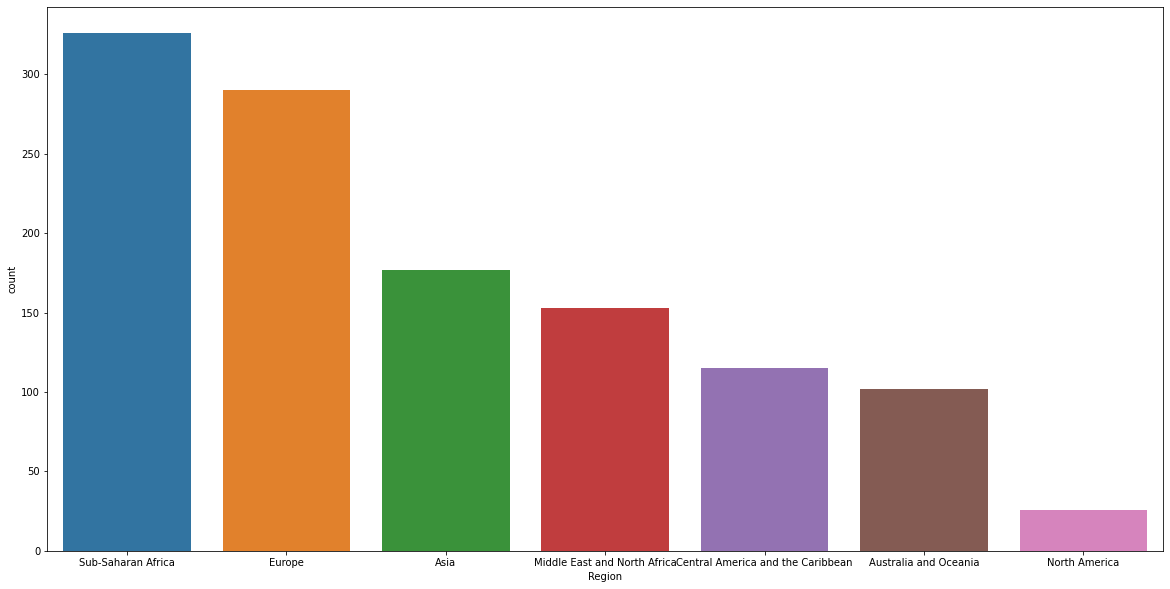

In [59]:
fig_dims = (20, 10)

fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Region', data= Num_of_days_1,order = Num_of_days_1['Region'].value_counts().index);

In [ ]:
# The  fastest was still done by Sub-Saharan Africa, followed by Europe in sending cereal and office supplies 
#which may require some preparation or transport from one place to another.